# Task 1

<span style="color:red; font-size:20pt">**Importing libraries and Loading Data**</span>


In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('pet_supplies_2212.csv')

In [106]:
df

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


<span style="color:red; font-size:20pt">**Understanding Data**</span>

In [107]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_id,1500.0,750.500000,433.157015,1.00,375.75,750.50,1125.2500,1500.00
sales,1500.0,996.597847,323.952676,286.94,747.42,1000.83,1158.1575,2255.96
rating,1350.0,4.991111,1.559755,1.00,4.00,5.00,6.0000,9.00
repeat_purchase,1500.0,0.604000,0.489228,0.00,0.00,1.00,1.0000,1.00


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [109]:
df[['product_id','price', 'sales']]

,product_id,price,sales
0,1,51.1,1860.62
1,2,35.98,963.60
2,3,31.23,898.30
3,4,24.95,982.15
4,5,26.18,832.63
...,...,...,...
1495,1496,40.91,1203.36
1496,1497,32.89,1099.97
1497,1498,25.79,724.02
1498,1499,19.94,658.66


In [110]:
for col in df.columns:
    if col not in ['product_id', 'price', 'sales']:
        print(f"Column Name: {col}")
        print()
        print(f"Number Of NULL Values: {df[col].isna().sum()}")
        print()
        print(f"Number Of Unique Values: {df[col].nunique()}")
        print()
        print(f"Unique Values: {df[col].unique()}")
        print()
        print(df[col].value_counts())
        print("-" * 70)
        print("-" * 70)

Column Name: category

Number Of NULL Values: 0

Number Of Unique Values: 7

Unique Values: ['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-']

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64
----------------------------------------------------------------------
----------------------------------------------------------------------
Column Name: animal

Number Of NULL Values: 0

Number Of Unique Values: 4

Unique Values: ['Bird' 'Dog' 'Cat' 'Fish']

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64
----------------------------------------------------------------------
----------------------------------------------------------------------
Column Name: size

Number Of NULL Values: 0

Number Of Unique Values: 9

Unique Values: ['large' 'MEDIUM' 'medium' 'small' 'Small' 'Large' 'SMALL' 'Medium'
 'LARGE']

small     372
medium    233
Small     225
SMALL  

<span style="color:red; font-size:20pt">**Cleaning Data and Handling Missing Values**</span>

In [111]:
df.query("price == 'unlisted'")

,product_id,category,animal,size,price,sales,rating,repeat_purchase
20,21,Food,Fish,medium,unlisted,542.06,NaN,0
44,45,Medicine,Bird,medium,unlisted,1209.41,NaN,0
46,47,Toys,Cat,SMALL,unlisted,1367.47,NaN,1
70,71,Equipment,Dog,LARGE,unlisted,1446.43,NaN,0
73,74,Food,Bird,Large,unlisted,1864.01,NaN,0
...,...,...,...,...,...,...,...,...
1447,1448,Medicine,Fish,medium,unlisted,456.96,NaN,1
1469,1470,Equipment,Fish,small,unlisted,710.47,NaN,0
1471,1472,Toys,Fish,small,unlisted,976.63,NaN,0
1476,1477,Housing,Bird,large,unlisted,1567.31,NaN,1


In [112]:
df['price'] = df['price'].replace('unlisted', np.nan)

df['price'] = df['price'].astype('float64')

In [113]:
df['price'].isna().sum()

150

In [114]:
df['price'].fillna(df['price'].median(), inplace=True)
df['price'].isna().sum()

0

In [115]:
df['category'] = df['category'].replace('-', 'Unknown')
df['category'].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64

In [116]:
df['size'] = df['size'].apply(lambda x: x.lower())
df['size'].value_counts()

small     754
medium    492
large     254
Name: size, dtype: int64

In [117]:
df['rating'].fillna(0, inplace=True)
df['rating'].isna().sum()

0

# Task 2

<span style="color:red; font-size:20pt">**how many products are Repeat Purchases**</span>

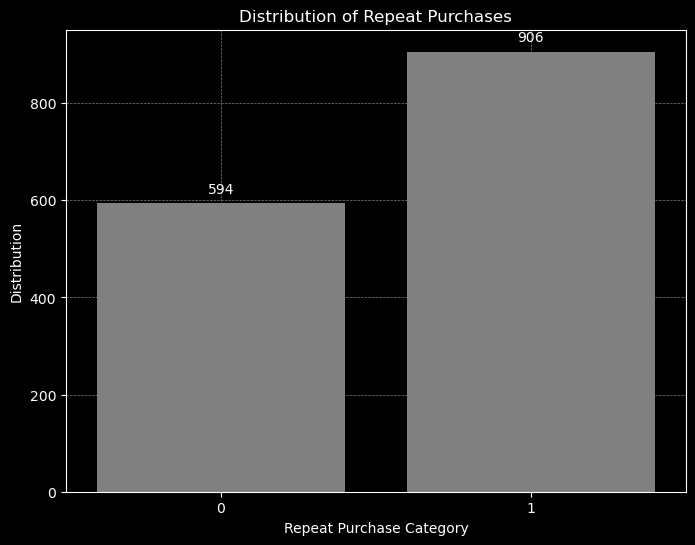

In [118]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='repeat_purchase', color='gray')
plt.title('Distribution of Repeat Purchases')
plt.xlabel('Repeat Purchase Category')
plt.ylabel('Distribution')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

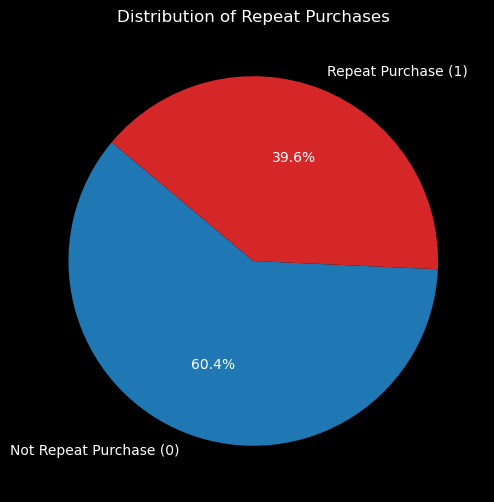

In [119]:
category_counts = df['repeat_purchase'].value_counts()

plt.figure(figsize=(8, 6))
labels = ['Not Repeat Purchase (0)', 'Repeat Purchase (1)']
colors = ['#1f77b4', '#d62728']

plt.pie(category_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Repeat Purchases')
plt.show()

# Task 3

<span style="color:red; font-size:20pt">**Distribution of all of the sales**</span>

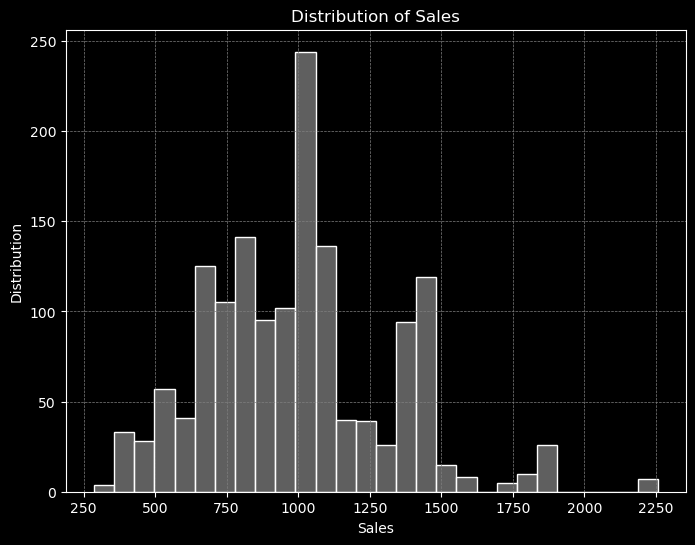

In [120]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='sales' ,color='gray')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Distribution')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Task 4

<span style="color:red; font-size:20pt">**Relationship Between Repeat Purchases and Sales**</span>

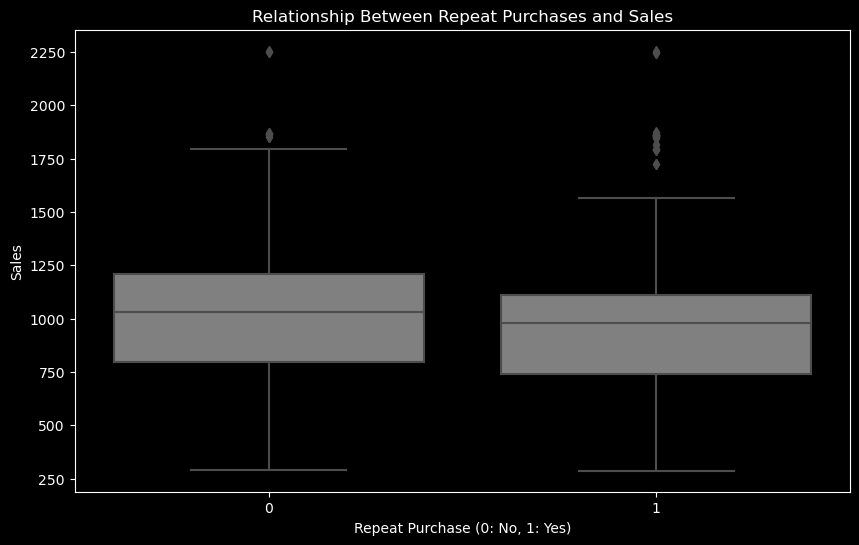

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='repeat_purchase', y='sales', color='gray')
plt.title('Relationship Between Repeat Purchases and Sales')
plt.xlabel('Repeat Purchase (0: No, 1: Yes)')
plt.ylabel('Sales')
plt.style.use('dark_background')
plt.show()

In [122]:
def remove_outliers_iqr(data_frame, column_name):
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_frame[(data_frame[column_name] >= lower_bound) & (data_frame[column_name] <= upper_bound)]
df = remove_outliers_iqr(df, 'sales')

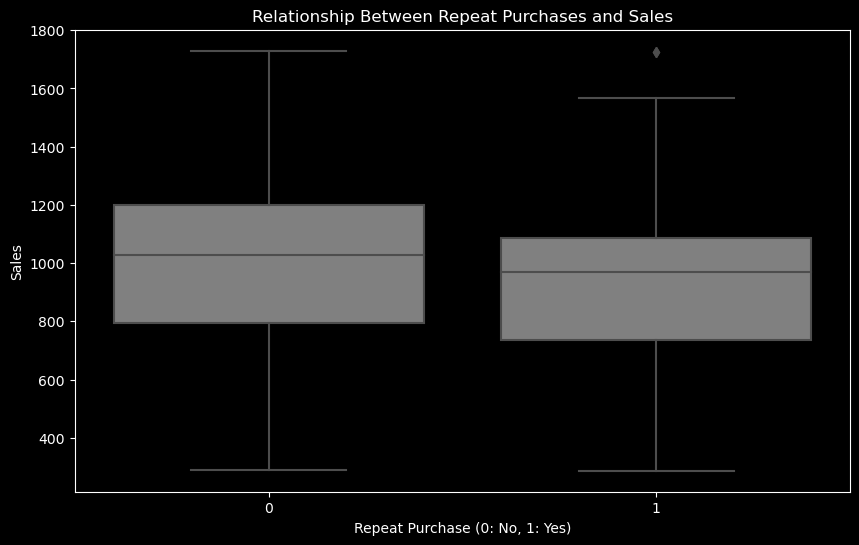

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='repeat_purchase', y='sales',  color='gray')
plt.title('Relationship Between Repeat Purchases and Sales')
plt.xlabel('Repeat Purchase (0: No, 1: Yes)')
plt.ylabel('Sales')
plt.style.use('dark_background')
plt.show()